In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
from data_loaders import *

nature = load_nature("WENO_FULLRES")

Using custom matplotlib style from 'mplstyle' file


Reading full profiles and timeseries for ObEnsembleDYCOMS_RF01...
	[create_mfdataset_with_nans()] Found 1 files.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 1 files.


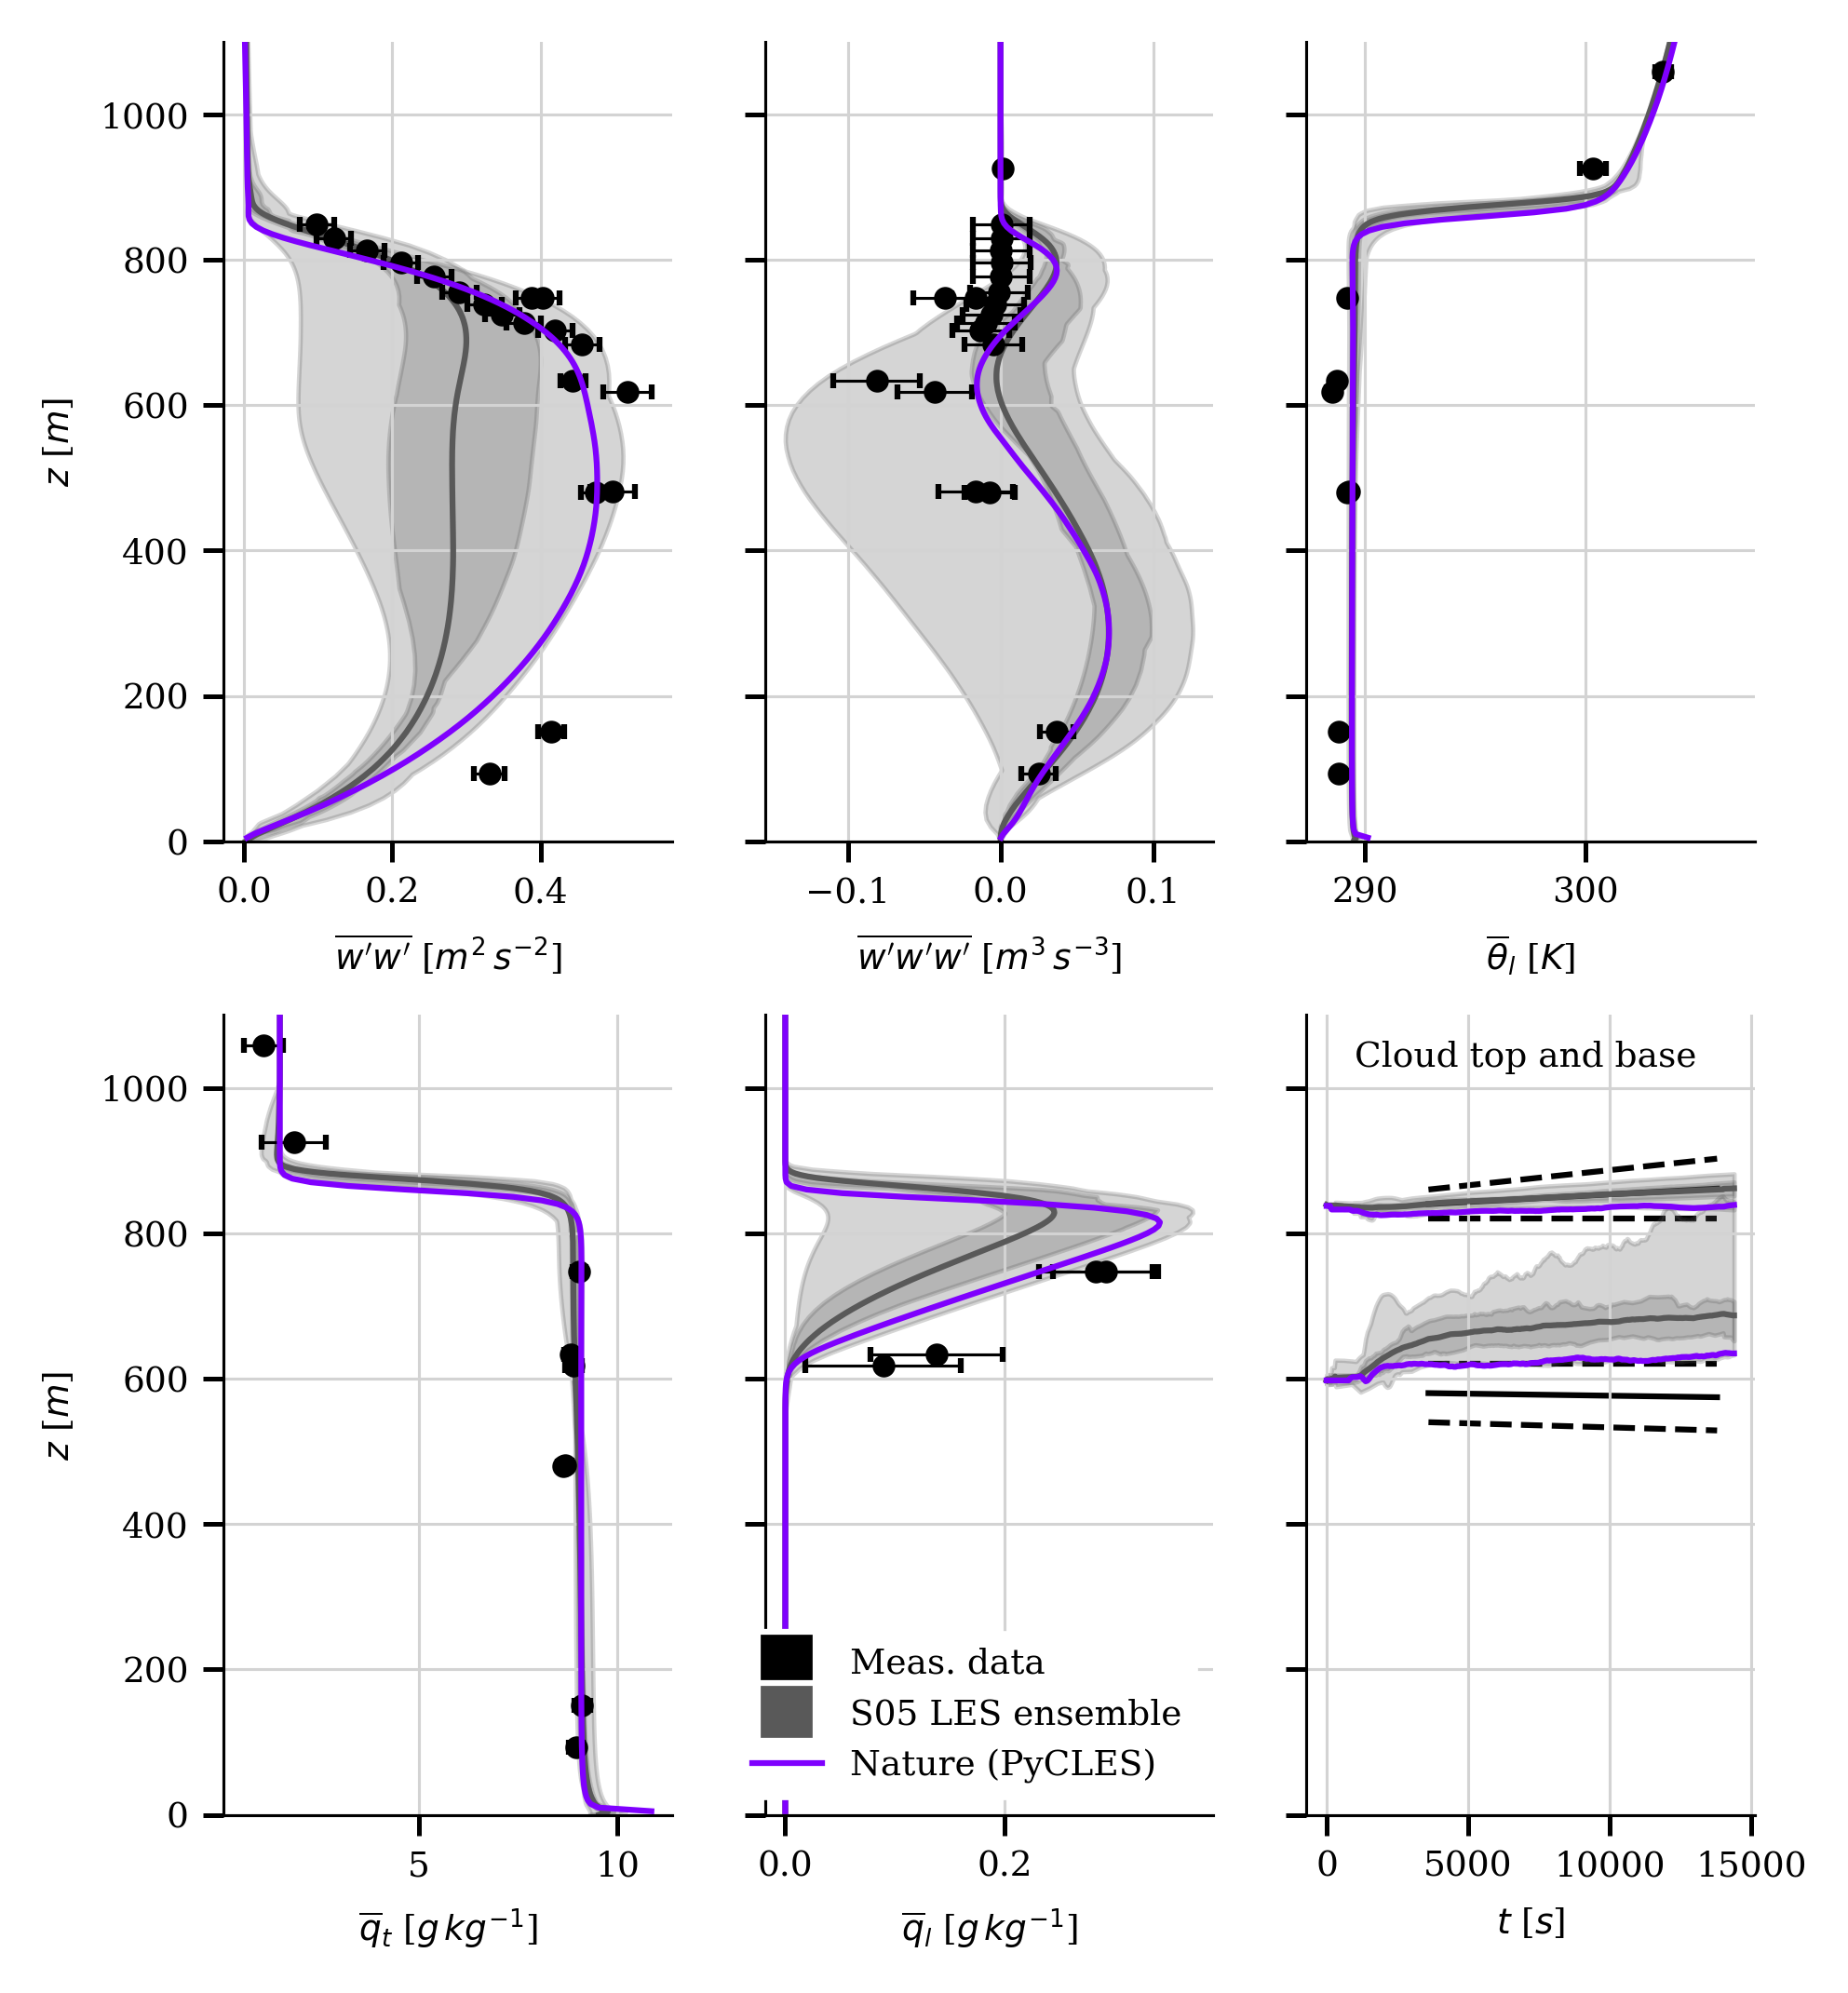

Saved figure  figs/fig-stevens_2005_ensemble


In [4]:
from calpycles.plotting.ens_obs import plot_ens_obs

from calpycles.DYCOMS_RF01.measurements import MeasurementsDYCOMS_RF01
meas = MeasurementsDYCOMS_RF01()

plot_ens_obs(
    [],
    [],
    meas,
    nature=nature,
    nature_name="Nature (PyCLES)",
    save_file=f"figs/fig-stevens_2005_ensemble",
    # cloud_height_type="mean",
    add_s05_les_ensemble=True,
)

In [5]:
ds = xr.open_dataset("data/Stevens_2005_LES_ensemble_gcss7.nc")
# moment (isel): 0=avg, 1=stddev, 2=min, 3=max, 4=1st qrtl, 5=3rdqrtl
ds

<xarray.Dataset>
Dimensions:      (moment: 6, time: 481, hour: 5, zt: 601, zw: 601)
Coordinates:
  * moment       (moment) int32 1 2 3 4 5 6
  * time         (time) float32 0.0 30.0 60.0 ... 1.434e+04 1.437e+04 1.44e+04
  * hour         (hour) float32 0.0 1.0 2.0 3.0 4.0
  * zt           (zt) float32 0.0 2.0 4.0 6.0 ... 1.196e+03 1.198e+03 1.2e+03
  * zw           (zw) float32 0.0 2.0 4.0 6.0 ... 1.196e+03 1.198e+03 1.2e+03
Data variables: (12/43)
    zi_bar       (moment, time) float32 ...
    zi_var       (moment, time) float32 ...
    zb_bar       (moment, time) float32 ...
    zb_var       (moment, time) float32 ...
    lwp_bar      (moment, time) float32 ...
    lwp_var      (moment, time) float32 ...
    ...           ...
    boy_prd      (moment, hour, zw) float32 ...
    transport    (moment, hour, zw) float32 ...
    dissipation  (moment, hour, zw) float32 ...
    storage      (moment, hour, zt) float32 ...
    sfs_boy      (moment, hour, zw) float32 ...
    e            (moment, hour, zw) float32 ...
Attributes:
    date:           Tue Feb  8 20:22:39 PST 2005
    author:         Bjorn Stevens
    title:          GCSS 7 (RF01) Step 3 Ensemble Statistics
    group:          Combined Analysis
    FillValue:      -999
    MissingValue:   -999
    step3_members:   ncfiles/revised/DHARMA_3_0, ncfiles/revised/DHARMA_3_1, ...

In [6]:
from data_loaders import load_nature 

nature = load_nature("WENO_FULLRES")

nature_profiles, nature_ts = nature.observable.obs_xr_full
nature_profiles, nature_ts

Reading full profiles and timeseries for ObEnsembleDYCOMS_RF01...
	[create_mfdataset_with_nans()] Found 1 files.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 1 files.


(<xarray.Dataset>
 Dimensions:         (sample: 1, t: 241, z: 300)
 Coordinates:
   * sample          (sample) int64 0
   * t               (t) float64 0.0 60.0 120.0 ... 1.428e+04 1.434e+04 1.44e+04
   * z               (z) float64 5.0 10.0 15.0 ... 1.49e+03 1.495e+03 1.5e+03
 Data variables:
     w_mean2         (sample, t, z) float64 0.0 0.0 0.0 ... 3.605e-09 1.125e-10
     w_mean3         (sample, t, z) float64 0.0 0.0 0.0 ... -1.173e-13 -1.998e-16
     qt_mean         (sample, t, z) float64 9.0 9.0 9.0 9.0 ... 1.5 1.5 1.5 1.5
     ql_mean         (sample, t, z) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     thetali_mean    (sample, t, z) float64 289.0 289.0 289.0 ... 306.9 306.9
     cloud_fraction  (sample, t, z) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0,
 <xarray.Dataset>
 Dimensions:                (sample: 1, t: 241)
 Coordinates:
   * sample                 (sample) int64 0
   * t                      (t) float64 0.0 60.0 120.0 ... 1.434e+04 1.44e+04
 Data variables:
    

In [7]:
from calpycles.plotting import make_figure
from calpycles.plotting import save_figure
from calpycles.plotting import SUBPLOTSIZE

def _plot_S05(ax, var):
    kwargs = dict(
        ax=ax,
        c="k",
    )
    
    # inconsistent dimension naming??
    if "zw" in ds[var].coords:
        kwargs["y"] = "zw"
    elif "zt" in ds[var].coords:
        kwargs["y"] = "zt"
    else:
        print("No vertical coordinate found")

    ds[var].isel(hour=-1).sel(moment=1).plot(label="mean", linestyle="-", **kwargs)
    # ds["w_var"].isel(hour=-1).sel(moment=2).plot(label="std", **kwargs)

    z = ds[kwargs["y"]].to_numpy().ravel()

    ax.fill_betweenx(
        z,
        ds[var].isel(hour=-1).sel(moment=3),
        ds[var].isel(hour=-1).sel(moment=4),
        label="min/max", color="k", alpha=0.25,
    )

    ax.fill_betweenx(
        z,
        ds[var].isel(hour=-1).sel(moment=5),
        ds[var].isel(hour=-1).sel(moment=6),
        label="quartiles", color="k", alpha=0.25,
    )

def _plot_S05_ts(ax, var):
    kwargs = dict(
        ax=ax,
        c="k",
        x="time"
    )
    
    ds[var].sel(moment=1).plot(label="mean", linestyle="-", **kwargs)

    time = ds["time"].to_numpy().ravel()

    ax.fill_between(
        time,
        ds[var].sel(moment=3),
        ds[var].sel(moment=4),
        label="min/max", color="k", alpha=0.25,
    )

    ax.fill_between(
        time,
        ds[var].sel(moment=5),
        ds[var].sel(moment=6),
        label="quartiles", color="k", alpha=0.25,
    )

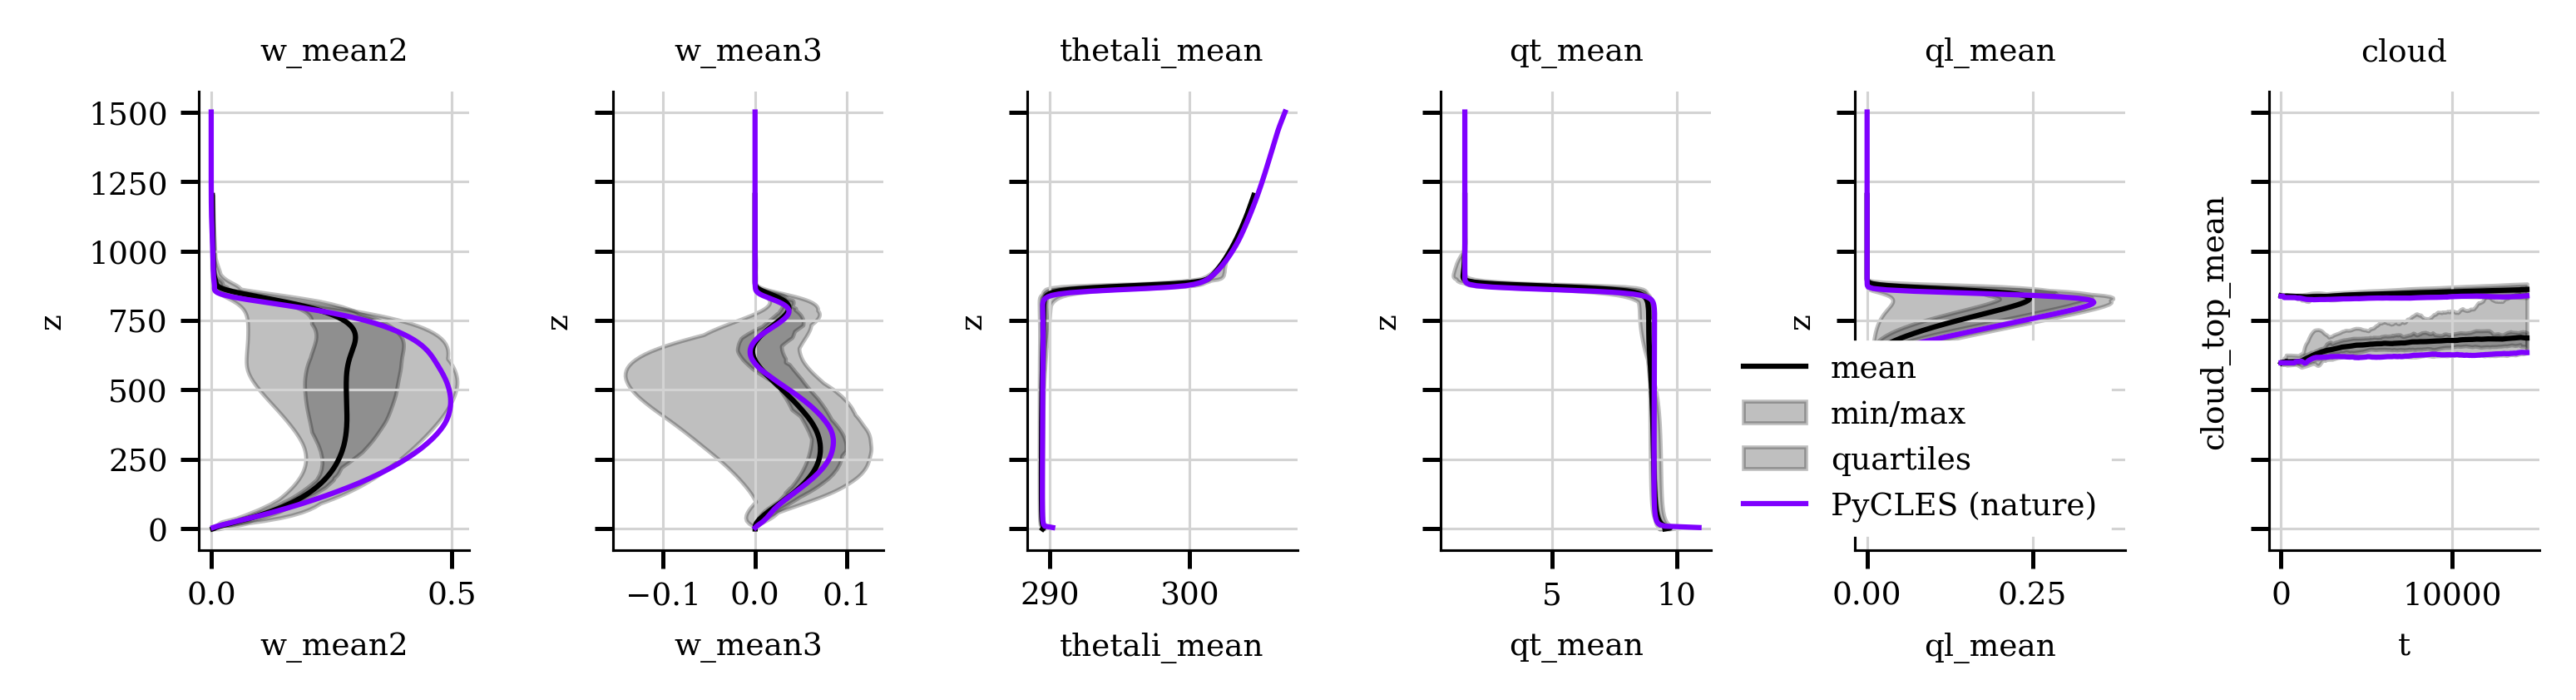

Saved figure  fig-S05


In [8]:
from calpycles.plotting import C_NATURE

variables = [
    "w_var",
    "w_skw",
    "thetal",
    "rt",
    "rl",
]
n_var = len(variables)

names = {
    "w_var": "w_mean2",
    "w_skw": "w_mean3",
    "thetal": "thetali_mean",
    "rt": "qt_mean",
    "rl": "ql_mean",
}

fig, axs = make_figure(n_var+1,1,width=n_var*SUBPLOTSIZE, horizontal=False, sharey=True)

# profiles
for ax,var_S05 in zip(axs,names):

    _plot_S05(ax, var_S05)
    
    var_nature = names[var_S05]
    nature_profiles[var_nature].sel(t=slice(10800,14400)).mean("t").plot(ax=ax, y="z", c=C_NATURE, label="PyCLES (nature)")

    ax.set_title(var_nature)

# timeseries
ax = axs[-1]
_plot_S05_ts(ax, "zb_bar")
_plot_S05_ts(ax, "zi_bar")

nature_ts["cloud_base_mean"].plot(ax=ax, x="t", c=C_NATURE, label="PyCLES (nature)")
nature_ts["cloud_top_mean"].plot(ax=ax, x="t", c=C_NATURE, label="PyCLES (nature)")
# inv_height_qt8.plot(ax=ax, x="t", c=C_NATURE, linestyle="--", label="PyCLES (nature)")
ax.set_title("cloud")
# ax.set_ylim(0,1000)

axs[-2].legend(loc="lower right")
save_figure(f"fig-S05")

In [10]:
### diagnose inversion = cloud top as z(qt=8)

import numpy as np

qt_threshold = 8
qt = nature_profiles["qt_mean"]
data = qt.isel(sample=0)
z_values = data.z.values

crossing_heights = []
for time_idx in range(data.sizes['t']):
    # Extract qt_mean profile at this time (across all z levels)
    qt_profile = data.isel(t=time_idx)  # shape: (z,)
    
    # Check if threshold is within the range
    if qt_profile.min() <= qt_threshold <= qt_profile.max():
        # Interpolate to find height where qt_mean crosses threshold
        # If qt decreases with height (typical), reverse for monotonic interpolation
        if qt_profile[0] > qt_profile[-1]:
            height = np.interp(qt_threshold, qt_profile.values[::-1], z_values[::-1])
        else:
            height = np.interp(qt_threshold, qt_profile.values, z_values)
    else:
        height = np.nan
    
    crossing_heights.append(height)

# Convert to xarray DataArray for easy plotting
inv_height_qt8 = xr.DataArray(
    crossing_heights,
    dims=['t'],
    coords={'t': data.t.values}
)

# inv_height_qt8.plot()

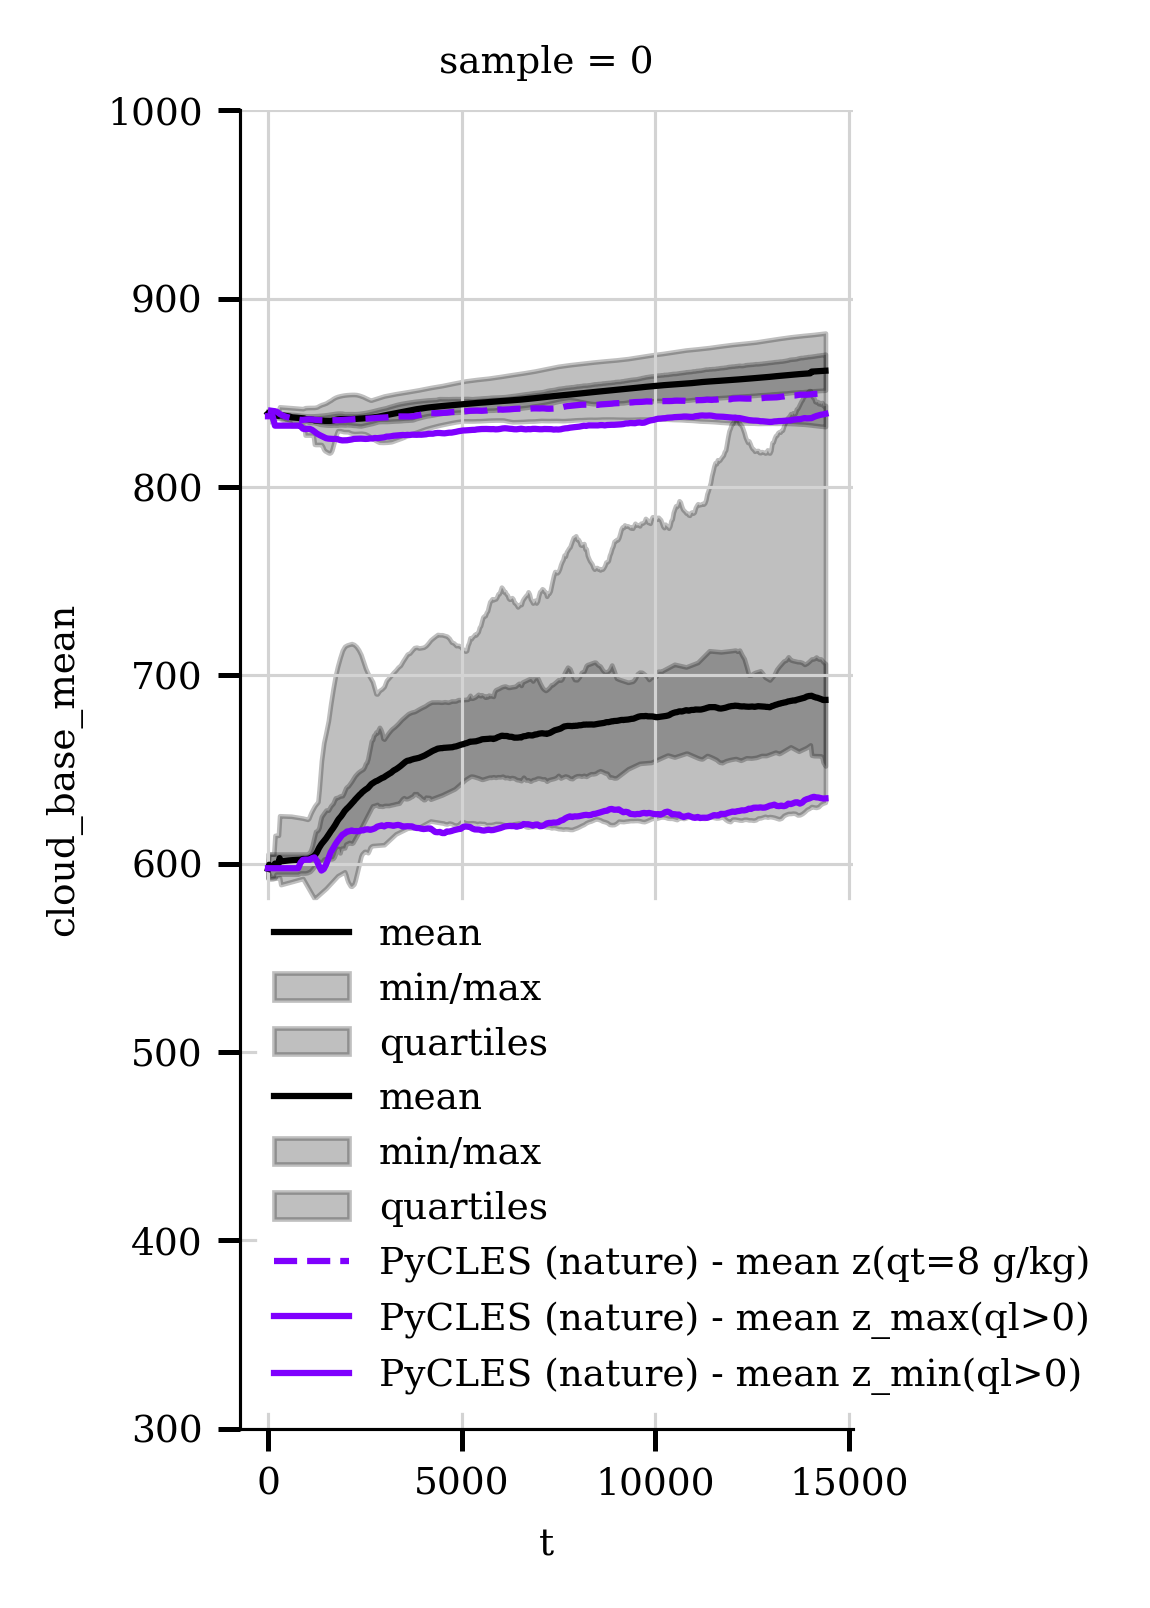

Saved figure  fig-cloud_top_defs


In [11]:
fig, axs = make_figure(1,1,fraction=0.4, horizontal=False, sharey=True)
ax = axs[0]

_plot_S05_ts(ax, "zb_bar")
_plot_S05_ts(ax, "zi_bar")

inv_height_qt8.plot(ax=ax, x="t", c=C_NATURE, linestyle="--", label="PyCLES (nature) - mean z(qt=8 g/kg)")
nature_ts["cloud_top_mean"].plot(ax=ax, x="t", c=C_NATURE, label="PyCLES (nature) - mean z_max(ql>0)")
nature_ts["cloud_base_mean"].plot(ax=ax, x="t", c=C_NATURE, label="PyCLES (nature) - mean z_min(ql>0)")

ax.legend()
ax.set_ylim(300,1000)
save_figure("fig-cloud_top_defs")

In [ ]:
### TO DO

# use last-h average also in paper EnKF? CHECK!
# make into paper data format
# add other models natures?

# top def: qt=0.8 isoheight !!!
# base def???
# what do the measurements evaluate???